In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
heart_disease = pd.read_csv("scikit-learn-data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
from sklearn.svm import LinearSVC

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

SVC_clf = LinearSVC()
SVC_clf.fit(X_train, y_train)

SVC_clf.score(X_test, y_test)

0.8688524590163934

In [5]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Random_clf = RandomForestClassifier()
Random_clf.fit(X_train, y_train)

Random_clf.score(X_test, y_test)

0.8688524590163934

In [6]:
%timeit SVC_clf.predict(X_test)
%timeit Random_clf.predict(X_test)

2.49 ms ± 560 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.6 ms ± 883 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Make Predictions using machine learning model

2 ways to make prediction:
  1) `predict()`
  2) `predict_proba()`

#### Make prediction with `predict()`

In [7]:
# RandomForestClassifier

Random_clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [8]:
# LinearSVC

SVC_clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [9]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [10]:
# Compare predictions to true labels to evaluate the model
# RandomForestClassifier

y_preds_rand = Random_clf.predict(X_test)
np.mean(y_preds_rand == y_test)

0.8688524590163934

In [11]:
# LinearSVC model

y_preds_SVC = SVC_clf.predict(X_test)
np.mean(y_preds_SVC == y_test)

0.8688524590163934

In [12]:
# LinearSVC model

SVC_clf.score(X_test, y_test)

0.8688524590163934

In [13]:
# RandomForestClassifier

Random_clf.score(X_test, y_test)

0.8688524590163934

In [14]:
# RandomForestClassification

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds_rand)

0.8688524590163934

In [15]:
# LinearSVC model

accuracy_score(y_test, y_preds_SVC)

0.8688524590163934

#### Make prediction with `predict_proba()`


In [16]:
# Predict_proba() returns probabilities of a classifiaction label
Random_clf.predict_proba(X_test[:5])

array([[0.83, 0.17],
       [0.39, 0.61],
       [0.46, 0.54],
       [0.87, 0.13],
       [0.23, 0.77]])

In [17]:
SVC_clf.predict_proba(X_test[:5])

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

#### `predict()` can also be used on regression model

In [18]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [19]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split into training and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create model instance
model_regre = RandomForestRegressor()

# Fit the model to the data
model_regre.fit(X_train, y_train)

# Make prediction
y_preds_regre = model_regre.predict(X_test)

In [21]:
y_preds_regre[:10]

array([0.46745  , 0.70179  , 4.849427 , 2.53712  , 2.32726  , 1.6584301,
       2.45379  , 1.61856  , 2.6368003, 4.8440781])

In [22]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds_regre)

0.32659606203972885

## Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

 * Estimator's built in `score()` method
 * The `scoring` parameter
 * Problem-specific metric function

In [23]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

classi_rando = RandomForestClassifier()

classi_rando.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# The highest Value for the .score() method is 1.0, the lowest is 0.0
classi_rando.score(X_train, y_train)

1.0

In [25]:
classi_rando.score(X_test, y_test)

0.8524590163934426

### Evaluating a model using the `scoring` method

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ran_classi = RandomForestClassifier()

ran_classi.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
ran_classi.score(X_test, y_test)

0.819672131147541

In [28]:
cross_val_score(ran_classi, X, y)

array([0.83606557, 0.90163934, 0.83606557, 0.8       , 0.78333333])

In [29]:
cross_val_score(ran_classi, X, y, cv = 10)

array([0.87096774, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.8       , 0.7       , 0.86666667, 0.73333333, 0.83333333])

In [30]:
np.random.seed(42)

# Single training and test split score
classi_single = ran_classi.score(X_test, y_test)

# Take the mean of 5-fold(default) cross validation score
classi_cross_val_score = np.mean(cross_val_score(ran_classi, X, y))

# Compare the two
classi_single, classi_cross_val_score

(0.819672131147541, 0.8248087431693989)

### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

In [31]:
np.random.seed(42)

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

yeah = RandomForestClassifier()
cross_val = cross_val_score(yeah, X, y)

In [32]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val) * 100:.2f}")

Heart Disease Classifier Cross-Validated Accuracy: 82.48


**Area under the receiver operating characteristic curve (AUC/ROC)**

 * Area under curve (AUC)
 * ROC Curve

ROC curves are a comparsion of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

 * True positive = model predicts 1 when truth is 1
 * False positive = model predicts 1 when truth is 0
 * True negative = model predicts 0 when truth is 0
 * False negative = model predicts 0 when truth is 1

In [33]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

close = RandomForestClassifier()

close.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
from sklearn.metrics import roc_curve

# Make prediction with probability
y_probab = close.predict_proba(X_test)

y_probab[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [35]:
y_probab_positive = y_probab[:, 1]
y_probab_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [36]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probab_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

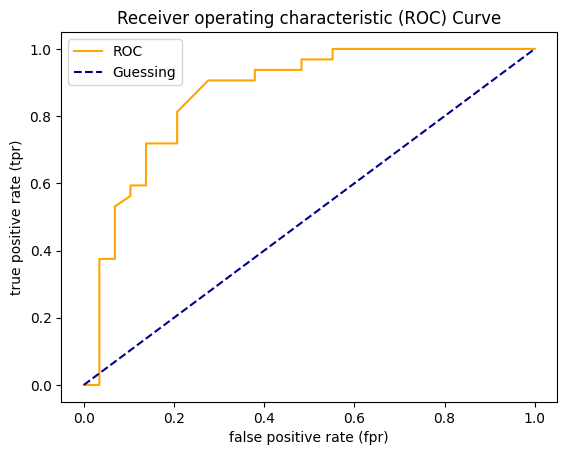

In [37]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    # plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Guessing")

    # Customize the plot
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Receiver operating characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probab_positive)

0.8669181034482759

#### Confusion matrix

A confusion matrix is a way to compare the labels a model perdicts and the actual label it was supposed to predict

In essence, giving you an idea of where the model is getting confused

In [39]:
from sklearn.metrics import confusion_matrix

y_close = close.predict(X_test)

confusion_matrix(y_test, y_close)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [40]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_close,
            rownames = ["Actual labels"],
            colnames = ["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


In [41]:
23 + 6 + 6 + 26

61

In [42]:
len(y_close)

61

In [43]:
len(X_test)

61

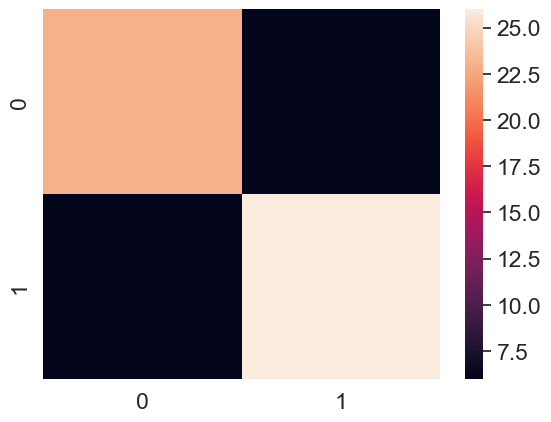

In [44]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test, y_close)

sns.heatmap(conf_mat);

### Creating confusion matrix using scikit-learn

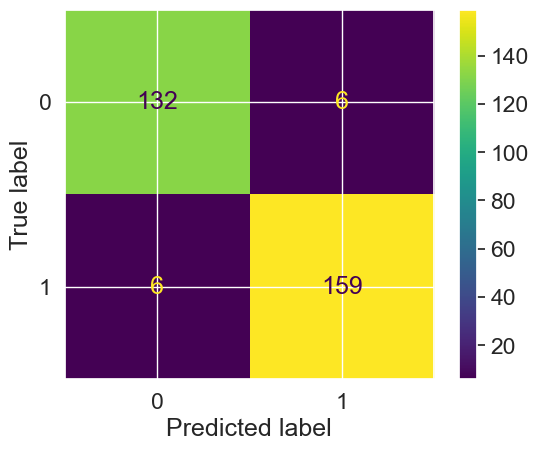

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = close, X = X, y = y)

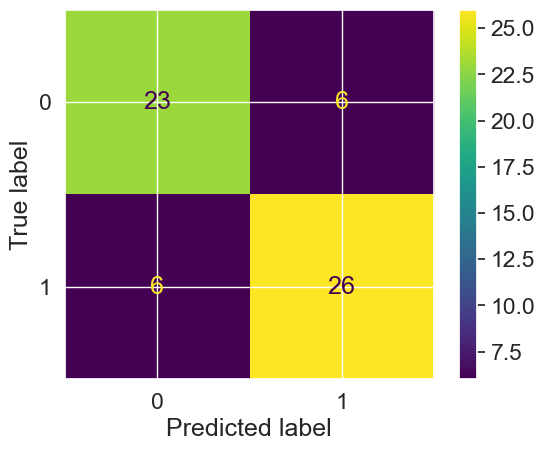

In [46]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, 
                                        y_pred = y_close);

#### Classification Report

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_close))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

